## Library yang dibutuhkan
Info: materi telah diperbarui pada tanggal 1 September 2021, pastikan kembali kode yang telah ditulis disesuaikan dengan bagian Lesson.
Pertama-tama, import terlebih dahulu library yang dibutuhkan secara berurutan, yaitu

- numpy, dan
- pandas

yang diimport sebagai aliasnya. Pandas seperti halnya yang telah kamu pelajari di

- Data Manipulation with Pandas - Part 1, dan
- Data Manipulation with Pandas - Part 2

dapat membaca langsung file berformat json. 

 

In [ ]:
import numpy as np
import pandas as pd

## Membaca Data COVID-19 Dunia
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
    
Gunakan method .read_json() pada library pandas yang sidah diimport tadi. Alamat url file yang akan diimport ini ada di: https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json.

Kemudian, ceklah ukuran dataset, 5 data teratas, dan 5 data terbawah.

     

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = 'https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json'
df_covid_worldwide = pd.read_json(covid_url)

print("Ukuran dataset: %d kolom dan %d baris.\n" % df_covid_worldwide.shape)
print("Lima data teratas:\n", df_covid_worldwide.head())
print("\nLima data terbawah:\n", df_covid_worldwide.tail())

## Reformat Data Frame COVID-19 Dunia
Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Dari hasil sebelumnya terlihat bahwa data frame df_covid_worldwide memiliki kolom yang berhubungan dengan tanggal (kolom date). Cek terlebih dahulu tipe data seluruh kolom pada data frame df_covid_worldwide ini. Kamu dapat menggunakan .dtypes atau .info(). Untuk pengerjaan kasus ini akan digunakan method .info().

Setelah tipe data di setiap kolomnya dicek dan kolom date juga sudah bertipe numpy.datetime64[ns] maka kolom ini dapat diset sebagai index untuk data frame df_covid_worldwide ini, menggunakan method .set_index. Setelah itu df_covid_worldwide diurutkan berdasarkan indeknya menggunakan .set_index, lakukan dengan menggunakan teknik chaining di pandas.

Kemudian cek kembali info dataframe yang telah diubah ini.

 

 

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Informasi data frame awal:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()

## Missing Value di DataFrame COVID-19 Dunia
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Hasil sebelumnya dengan ada kolom dengan missing value, cobalah inspeksi seluruh kolom apakah ada yang memiliki missing value!

Wah, ternyata kolom geo_id memiliki missing value sebanyak 275 butir data dari total 61900 baris data yang dimiliki. Kolom geo_id ini akan digabungkan dengan satu dataset lagi sehingga dapat ditentukan negaranya melalui nama negaranya bukan dengan geo_id negara.

Buanglah baris data yang memiliki missing value ini. 

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())

## Membaca Data Countries
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Bacalah dataset countries melalui alamat url https://storage.googleapis.com/dqlab-dataset/country_details.json yang ditempatkan ke variabel df_countries. Lalu inspeksilah dataset dengan mencetak lima data teratas dari dataframe countries (df_countries).

Apa yang dapat kamu simpulkan dari kedua dataset ini?

 

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)
print(df_countries.head())

## Merge Covid19 Data dan Countries
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi .merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. 

Untuk merge, gunakan kolom geo_id, (ingat ya df_covid_worldwide memiliki index pada kolom date untuk itu perlu .reset_index()). Setelah merge dapat diset kembali index ke kolom date.

Lalu print sample data dengan menggunakan head().

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge( df_covid_worldwide.reset_index(),df_countries, on='geo_id').set_index('date')
print(df_covid_denormalized.head())

## Menghitung Fatality Ratio
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan confirmed_cases.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized['deaths']/df_covid_denormalized['confirmed_cases']
print(df_covid_denormalized.head())

## Negara-negara dengan Fatality Ratio Tertinggi
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

Kamu dapat melihat outputnya ada beberapa negara muncul berulang, sekarang kamu dapat menginspeksinya sendiri pada tanggal kapan itu terjadi.

 

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]

df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

## Kondisi Fatality ratio Tertinggi di Bulan Agustus 2020
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Ya, berikut tanggal kemunculan berulang negara-negara dengan 20 besar fatality ratio tertinggi


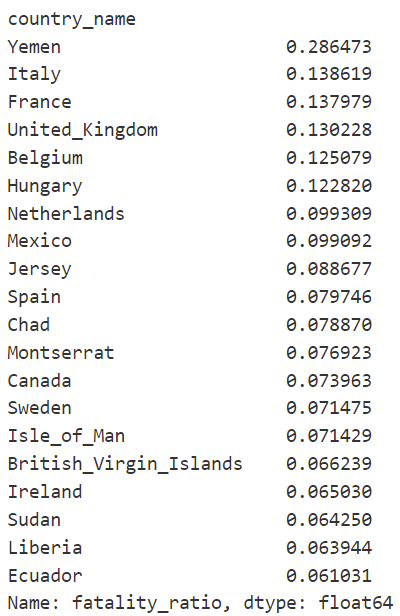
 

Untuk itu, kita dapat mengakses fatality rate yang terjadi pada bulan Agustus saja dan kemudian 20 negara dengan fatality rate tertinggi akan diurutkan. Untuk itu bagaimanakah caranya?

- Sebelum dihitung fatality_rate nya kita ambil dahulu kasus pada bulan Agustus 2020 menggunakan .loc. Setelah itu kamu dapat melakukan pengelompokkan menggunakan .groupby berdasarkan negara (kolom country_name) dan menghitung jumlahnya selama bulan Agustus 2020 ini menggunakan .sum.
- Buatlah kolom baru fatality_ratio untuk mengitung rasio kefatalan di bulan Agustus 2020 seperti yang telah dikerjakan sebelumnya, dan jangan lupa urutkan 20 negara dengan fatality ratio tertinggi.
 

**Jika kamu memiliki cara lain dalam menentukan hal ini dapat di-post melalui discord modul ini agar member lainnya dapat mengetahui dan belajar cara lainnya :)**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name")[['deaths', 'confirmed_cases']].sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august['deaths']/df_covid_denormalized_august['confirmed_cases']

df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate_on_august["fatality_ratio"])

## Visualisasi Negara dengan Fatality Ratio Tertinggi di Bulan Agustus 2020
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart, tepatnya horizontal bar chart.  

Dengan memilih kolom fatality_ratio pada data frame df_top_20_fatality_rate_on_august terapkanlah method-method berikut secara chaining mulai dari pengurutan dengan .sort_values, plot dengan .plot menggunakan keyword argument kind="barh".




In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]

df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values("fatality_ratio", ascending=False).head(20)

# Visulisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## Data Frame Kasus COVID-19 ASEAN
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

- MY -> Malaysia,
- SG -> Singapore,
- TH -> Thailand,
- VN -> Vietnam.

Ambillah kelima negara melalui variabel data frame df_covid_denormalized dengan menerapkan memilih kolomnya. Di sini kamu dapat menggunakan list comprehension untuk mempersingkat perulangan. Hasil proses komparasi kolom geo_id data frame df_covid_denormalized dengan list asean_country_id yang berisi ["ID", "MY", "SG", "TH", "VN"] di konversikan ke numpy array menggunakan .to_numpy. Hasil ini ditempatkan ke  variabel filter_list.

Setelah itu buat variabel filter_array yang berisi stack filter_list berdasarkan kolom mengunakan np.column_stack, jumlahkan berdasarkan axis=1 dan set keyword argument lainnya yaitu dtypes="bool".

Pertanyaan yang dapat kamu jawab yaitu kenapa bisa digunakan .sum dengan keyword argument axis=1 dan dtypes="bool" pada langkah ini?

    Langkah terakhir kamu dapat mengambil subset data frame df_covid_denormalized dengan nama df_covid_denormalized_asean menggunakan filter_array.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json('../dataset/covid19_worldwide_2020.json')
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json('../dataset/country_details.json')

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
print(df_covid_denormalized_asean.head())

## Kapankah Kasus Pertama COVID-19 di ASEAN
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Sekarang kita akan cek kapankah kasus pertama COVID-19 di masing-masing lima negara ASEAN ini terjadi? Kamu dapat menggunakan kolom confirmed_case untuk mengecek kemunculan kasus pertama yang terkonfirmasi.

Apa yang dapat kamu ketahui dari hasilnya?

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("The first case popped up in each of 5 ASEAN countries:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

## Kasus Covid-19 di ASEAN mulai Bulan Maret 2020
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Filter kolom date dari data df_covid_denormalized_asean sehingga hanya data dari tanggal 1 Maret 2020 sampai tanggal terakhir di data frame yang diambil. 

Komparasikan index df_covid_denormalized_asean dengan tanggal yang dimaksud.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
print(df_covid_denormalized_asean_march_onward.head())

## Visualisasi Kasus COVID-19 di ASEAN
    Info: Predefined code telah diperbarui pada tanggal 19 September 2022, pastikan kode yang telah ditulis disesuaikan kembali.
Untuk visualisasi kali ini, kamu dapat menggunakan seaborn lineplot untuk menampilkan perbandingan kasus di lima negara ASEAN mulai per 1 Maret 2020. Gunakan keyword argument data yaitu df_covid_denormalized_asean_march_onward, x yaitu index data frame df_covid_denormalized_asean_march_onward, y yaitu kolom confirmed_cases, dan hue yaitu kolom country_name.

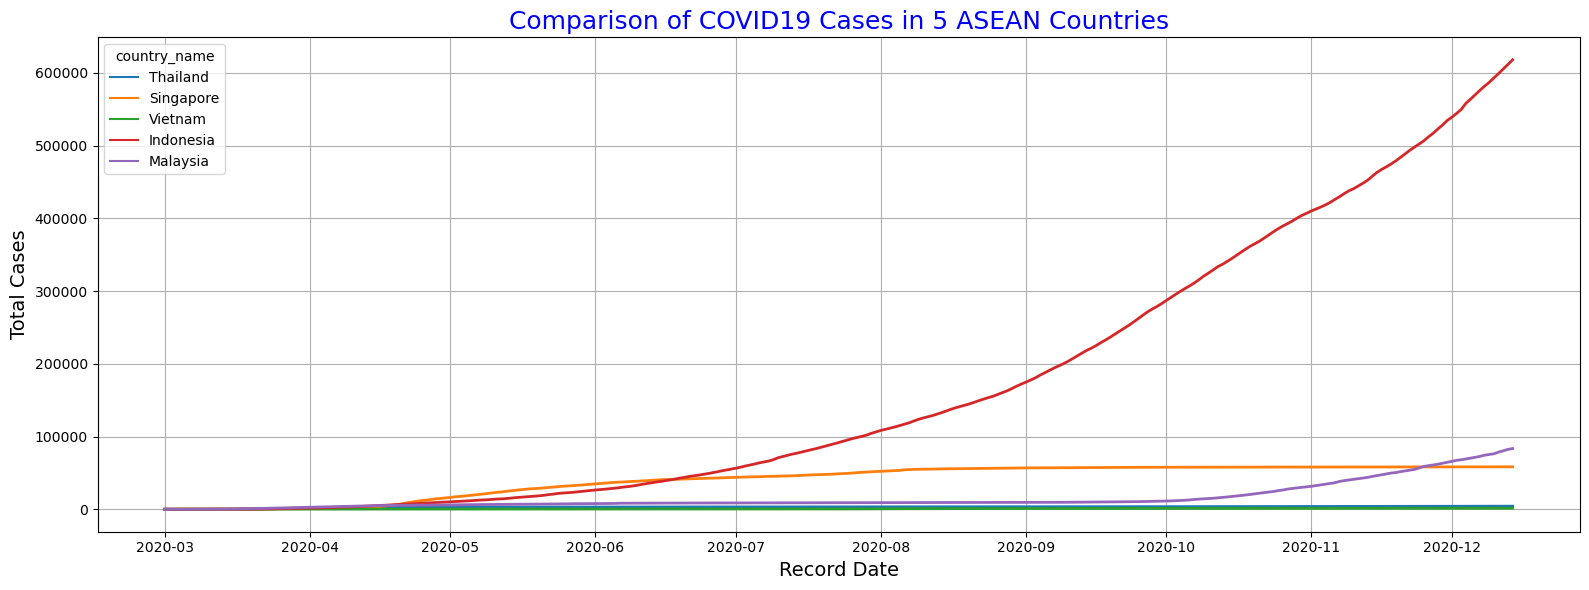

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "../dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "../dataset/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(data=df_covid_denormalized_asean_march_onward, 
             x=df_covid_denormalized_asean_march_onward.index, 
             y="confirmed_cases", 
             hue="country_name",
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()